In [1]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# load model
model = load_model('0330model.h5')
model.summary()

input_img = model.layers[0].input
layer_names = ["conv1d_1","conv1d_2","conv1d_3"]
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 730, 553)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 715, 3)            26547     
_________________________________________________________________
batch_normalization_1 (Batch (None, 715, 3)            12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 715, 3)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 700, 3)            147       
_________________________________________________________________
batch_normalization_2 (Batch (None, 700, 3)            12        
_________________________________________________________________
dropout_2 (Dropout)          (None, 700, 3)            0         
__________

In [2]:
# load weights

for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    
layer_dict = dict([(layer.name, layer) for layer in model.layers])
a = model.layers[1].get_weights()
b = model.layers[4].get_weights()

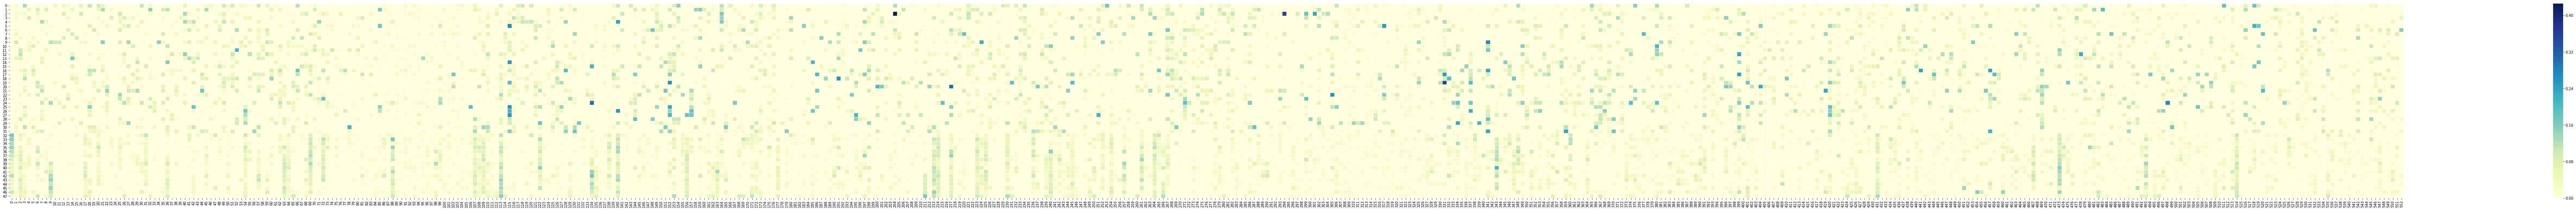

In [3]:
# flattern the 16 * 3 matrices to arrays
filters_1 = np.zeros((48,553))
for i in range(3):
    for j in range(16):
        for k in range(553):
            filters_1[j+i*16,k] = max(a[0][j][k][i],0)
            

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(150,10))
ax = sns.heatmap(filters_1,linewidths=0.01,cmap="YlGnBu")
plt.savefig('layer1_weights_heat.jpg')
plt.show()


In [4]:
filters_1_mean = np.zeros((1,553))
for i in range(553): filters_1_mean[0,i] = np.mean(filters_1[:,i])

filters_1_max = np.zeros((1,553))
for i in range(553): filters_1_max[0,i] = np.max(np.absolute(filters_1[:,i]))
    
filters_1_sum_square = np.zeros((1,553))
for i in range(553):
    sum_ = 0
    for j in range(48):
        sum_ += np.square(filters_1[j,i])
    filters_1_sum_square[0,i] = sum_

    
def sort_(filters_1):
    l_filters = []
    for i in range(len(filters_1[0])):
        l_filters.append((filters_1[0,i],i))
    l_filters = sorted(l_filters, key=lambda x: x[0], reverse=True)
    x_, y_ = np.zeros(len(filters_1[0])), np.zeros(len(filters_1[0]))
    for i in range(len(filters_1[0])):
        x_[i] = l_filters[i][1]
        y_[i] = l_filters[i][0]
    return x_, y_

x_1_mean, y_1_mean = sort_(filters_1_mean)
x_1_max, y_1_max = sort_(filters_1_max)
x_1_sum_square, y_1_sum_square = sort_(filters_1_sum_square)

In [5]:
filters_2_sum_square = np.zeros((1,553*3))
for i in range(553):
    for j in range(3):
        filters_2_sum_square[0,i*3+j] = np.sum(np.square(filters_1[j*16:j*16+15,i]))
        
x_2_sum_square, y_2_sum_square = sort_(filters_2_sum_square)
x_2_sum_square
np.floor(x_2_sum_square/3)[:25], y_2_sum_square[:25],x_2_sum_square[:25]

(array([ 115.,  152.,  204.,  331.,  473.,  113.,  337.,  343.,    0.,
         115.,  469.,  140.,  399.,  294.,  420.,  217.,  213.,  341.,
          88.,  334.,   69.,  164.,  380.,  341.,  134.]),
 array([ 0.2464767 ,  0.22188546,  0.21309008,  0.2102431 ,  0.18494468,
         0.16488619,  0.16432704,  0.16236479,  0.15589845,  0.15350671,
         0.14010857,  0.13787854,  0.1354431 ,  0.13534855,  0.1327763 ,
         0.13029907,  0.12560082,  0.1236689 ,  0.12349742,  0.11973914,
         0.11878121,  0.11830223,  0.11780878,  0.11766519,  0.11103714]),
 array([  346.,   457.,   612.,   994.,  1421.,   341.,  1012.,  1031.,
            2.,   345.,  1408.,   422.,  1198.,   882.,  1261.,   652.,
          641.,  1024.,   266.,  1003.,   209.,   492.,  1140.,  1023.,
          404.]))

In [81]:
x_1_sum_square[:20], y_1_sum_square[:20]

(array([ 115.,  140.,  341.,  152.,  399.,  134.,  331.,  473.,  113.,
         217.,  204.,  420.,  343.,  122.,  337.,  457.,  213.,   69.,
         380.,  334.]),
 array([ 0.4264231 ,  0.31277178,  0.30359644,  0.29338264,  0.26951796,
         0.26722865,  0.26059164,  0.24378421,  0.2424156 ,  0.24206723,
         0.21667102,  0.20992494,  0.17717115,  0.17648586,  0.17356524,
         0.17167954,  0.16720701,  0.16556567,  0.16378044,  0.16141249]))

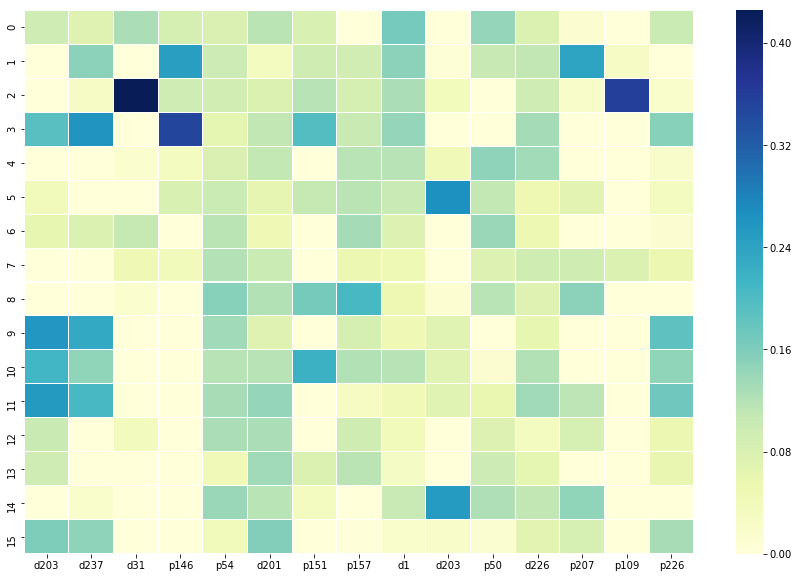

In [7]:
filters_2 = np.zeros((16,15))
for i in range(15):
    m = int(int(x_2_sum_square[i]) % 3)
    for j in range(16):
        filters_2[j,i] = filters_1[16*m+j,int(np.floor(x_2_sum_square/3)[i])]

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ticklabel = ['d203','d237','d31','p146','p54','d201','p151','p157','d1','d203','p50','d226','p207',
             'p109','p226']
             #top16-25:'d43','d4','p155','d18','p149','d162','d248','p190','p155','d220']
plt.figure(figsize=(15,10))
ax = sns.heatmap(filters_2,linewidths=0.01,cmap="YlGnBu",xticklabels=ticklabel)
plt.savefig('layer2_weights_heatmap.jpg')
plt.show()

In [102]:
int(x_2_sum_square[i])

2

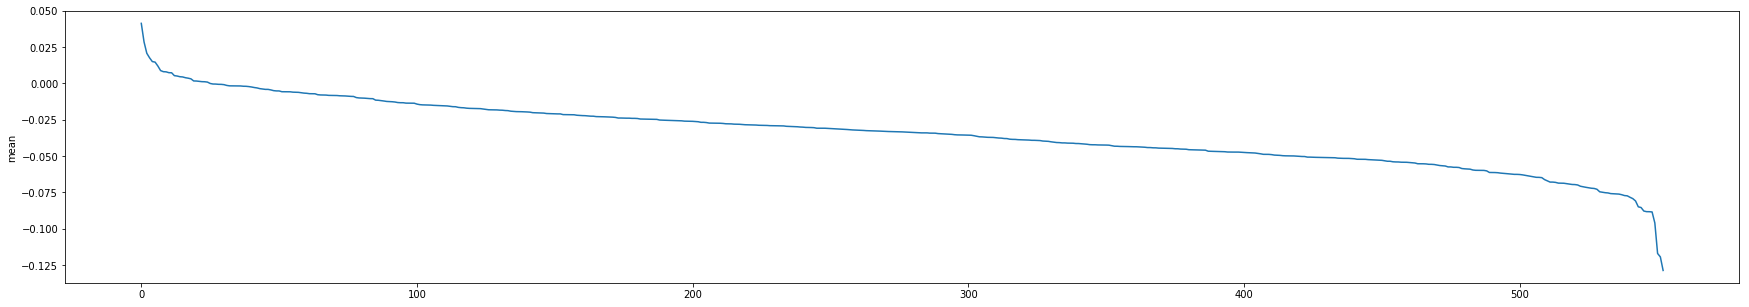

114 0.0412220555069
421 0.0284005954406
116 0.020628658264
224 0.0175115283613
342 0.0149243131127
135 0.014552078
470 0.0118973284989
452 0.00872497101651
117 0.00797103105773
268 0.0078515932352
494 0.00728099645736
400 0.00720820300921
153 0.00523333312951
344 0.00498433333996
154 0.00450197551254
514 0.00434998054698
174 0.00382109472533
111 0.0034937656219
4 0.00305165759952
437 0.00159547146177


In [188]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,5))
ax = plt.axes()
x = np.arange(553)
plt.plot(x,y_1_mean)
plt.ylabel('mean')
plt.show()
fig.savefig('mean_.jpg')
for i in range(20):
    print(int(x_1_mean[i]),y_1_mean[i])

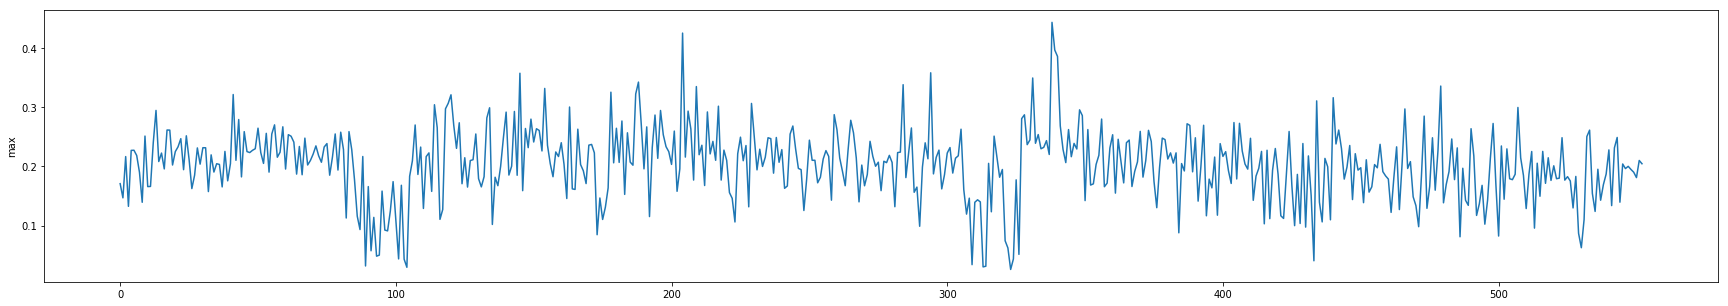

339 0.443724602461
205 0.425569087267
340 0.396906256676
341 0.386107265949
295 0.358453959227
146 0.357696712017
332 0.349656641483
189 0.342707961798
285 0.338330537081
480 0.336009174585
210 0.335150450468
155 0.332008689642
179 0.325646877289
188 0.322646707296
42 0.321695268154
121 0.321234643459
441 0.316338479519
435 0.310949653387
120 0.306919068098
230 0.306635469198


In [221]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,5))
ax = plt.axes()
x = np.arange(553)
plt.plot(x,filters_1_max[0,:])
plt.ylabel('max')
plt.show()
fig.savefig('max_.jpg')
for i in range(20):
    print(int(x_1_max[i]),y_1_max[i])

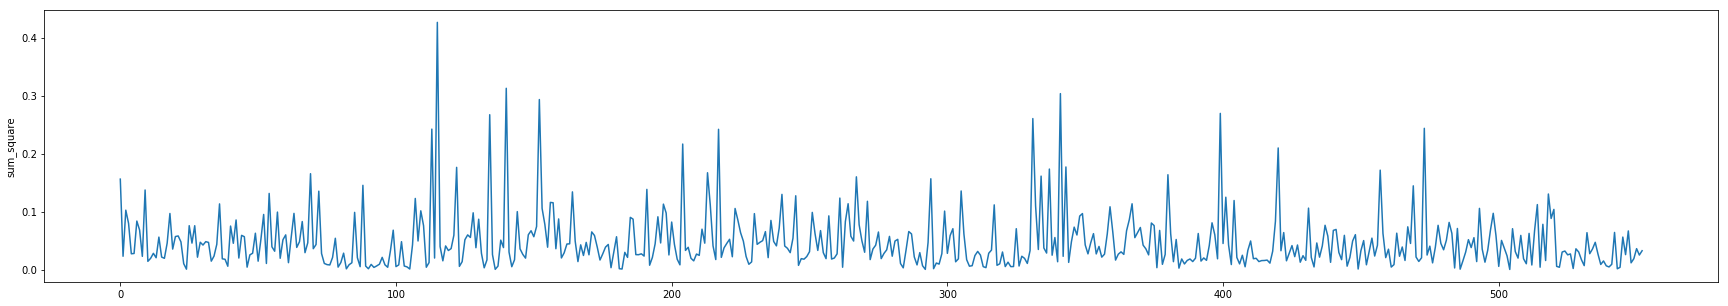

115 	 0.426423101718
140 	 0.31277178085
341 	 0.303596435889
152 	 0.293382638214
399 	 0.269517959542
134 	 0.26722865232
331 	 0.260591640283
473 	 0.24378420686
113 	 0.242415600947
217 	 0.242067232369
204 	 0.216671017341
420 	 0.209924937128
343 	 0.177171146456
122 	 0.176485860735
337 	 0.173565244188
457 	 0.171679542892
213 	 0.167207006793
69 	 0.165565673156
380 	 0.163780440465
334 	 0.161412489602


In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,5))
ax = plt.axes()
x = np.arange(553)
plt.plot(x,filters_1_sum_square[0,:])
plt.ylabel('sum_square')
plt.show()
fig.savefig('sum_square.jpg')
for i in range(20):
    print(int(x_1_sum_square[i]),'\t',y_1_sum_square[i])

In [213]:
filters_1_max_ss = np.zeros((1,553))
for i in range(553):
    arr_ = np.zeros(3)
    for j in range(3):
        sum_ = 0
        for k in range(16):
            sum_ += np.square(a[0][k][i][j])
        arr_[j] = sum_
    filters_1_max_ss[0,i] = np.max(arr_)
    
x_1_ss, y_1_ss = sort_(filters_1_max_ss)

x_1_ss[:20]-1

array([ 340.,  338.,  339.,  187.,  188.,  145.,  119.,  327.,  348.,
         84.,  543.,  229.,  330.,  140.,  120.,  466.,  189.,   77.,
        118.,  336.])

In [172]:
plt.imshow(filters_2_mean, cmap = plt.get_cmap('gray'))
plt.imsave('new_output.jpg',filters_2_mean, cmap = plt.get_cmap('gray'))

In [3]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# load model
model = load_model('CNNmodel_without_dmg.h5')
model.summary()
a = model.layers[1].get_weights()
a

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_main (InputLayer)          (None, 730, 553)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 715, 3)            26547     
_________________________________________________________________
batch_normalization_3 (Batch (None, 715, 3)            12        
_________________________________________________________________
dropout_4 (Dropout)          (None, 715, 3)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 357, 3)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 357, 3)            12        
_________________________________________________________________
flatten_2 (Flatten)          (None, 1071)              0         
__________

[array([[[ 0.0019118 ,  0.02335926, -0.04387128],
         [-0.00756111,  0.02753916,  0.01432256],
         [ 0.06831265,  0.00181439, -0.05222056],
         ..., 
         [-0.04462916, -0.00075281, -0.03769986],
         [ 0.0257359 , -0.04169337,  0.05035512],
         [-0.02682929,  0.00434239, -0.01631476]],
 
        [[ 0.03730667, -0.01281666, -0.05020208],
         [-0.04561434, -0.0097354 , -0.00119813],
         [ 0.03369819,  0.048335  , -0.05503586],
         ..., 
         [ 0.00731584, -0.03852099,  0.00388228],
         [ 0.10389644, -0.00514673,  0.00420764],
         [-0.0479988 , -0.02848801, -0.04912044]],
 
        [[ 0.04847876, -0.02100778,  0.00102471],
         [-0.05955108,  0.00755899,  0.00923906],
         [ 0.01625424,  0.04915411, -0.04012355],
         ..., 
         [-0.08471173, -0.02493093, -0.03249332],
         [ 0.04943059, -0.02927539,  0.07440579],
         [ 0.00090745, -0.0232406 , -0.00959016]],
 
        ..., 
        [[ 0.04230103, -0.011826